In [0]:
#Connecting google drive for dataset
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


#Dataset
I have taken 4 classes(car,airplane,table,chair). each object contains 100 classes. and each class contanis 6 different images.\
For data Preparation their is another notebook.

In [0]:

am1=am1.view(2400,3,128,128)
arr_3DD=arr_3DD.view(2400,32,32,32)

In [0]:
am=torch.tensor(am).view((100,24,3,128,128))

In [0]:
am1.shape

torch.Size([800, 24, 3, 128, 128])

In [0]:
#Random shuffle the dataset
np.random.seed(0)
am1=np.random.permutation(am1)

In [0]:
np.random.seed(0)
arr=np.random.permutation(arr_3DD)

As I am traning data on colab so its quiet difficuly to import all the images. thats why i first prepared \
the images to npy and then upload it.

In [0]:
import torch
import numpy as np
#am1=torch.tensor(np.load("/content/gdrive/My Drive/Data/images_200.npy"))#.view(100,24,3,128,128))


#am2=(torch.tensor(np.load("/content/gdrive/My Drive/Data/tr1.npy"))).view(100,24,3,128,128)
"""
am3=(torch.tensor(np.load("/content/gdrive/My Drive/Data/tr2.npy"))).view(100,24,3,128,128)
am4=(torch.tensor(np.load("/content/gdrive/My Drive/Data/tr3.npy"))).view(100,24,3,128,128)
"""
                 
#arr_3D=(torch.tensor(np.load("/content/gdrive/My Drive/Data/Data_3D_200.npy")))#.#view(100,1,32,32,32)
arr_3D=(torch.tensor(np.load("/content/gdrive/My Drive/Data/data_3D.npy")))#.


#Binary Converted Data
#######arr_3D=(torch.tensor(np.load("/content/gdrive/My Drive/F/data_3DD.npy"))).view(100,24,2,32,32,32)


In [0]:
am1=torch.tensor(am1)

In [0]:
arr_3D=arr_3D.view(800,32,32,32)


The dataset is like 6 images from different views of a object. and Its corrosponding 3D.
So I associate each image with 3D.To be trained.

In [0]:
#######FOR  Making 1Data===whole
arr_3DD=torch.zeros(,24,32,32,32)
for i in range(arr_3DD.shape[0]):
  for j in range(24):
    arr_3DD[i][j]=arr_3D[i]
  

In [0]:
#####Testing Purpose###################
l1=[]
l1.append(am1)
l1.append(am2)
l1.append(am3)
l1.append(am4)

In [0]:
import os
import pandas as pd
from torchvision import transforms
import PIL.Image as Image
import torch

In [0]:
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
from torch.nn import Linear,Conv2d,MaxPool2d,LeakyReLU,ConvTranspose3d,Tanh,Sigmoid,ConvTranspose2d,Conv3d



In [0]:


class GRUNet(nn.Module):
   
    def __init__(self):
        print("\ninitializing \"BaseGRUNet\"")
        super(GRUNet, self).__init__()
        self.is_x_tensor4 = False
        
        self.batch_size, self.img_w, self.img_h=1,128,128
        self.input_shape = (self.batch_size, 3, self.img_w, self.img_h)# here 1 is batch size
        
        #number of filters for each convolution layer in the encoder
        self.n_convfilter = [96, 64, 128, 256, 256,256]#n[1:]=256
        
        #the dimension of the fully connected layer
        self.n_fc_filters = [1024]
        
        #number of filters for each 3d convolution layer in the decoder
        self.n_deconvfilter = [1024,256, 128,64, 32, 16,2]#n[0]=128                       ######one more conv to add as to convert dimenstion of conv
        
        self.encoder=encoder(self.input_shape,self.n_convfilter,\
                            self.n_fc_filters)
        #HERE THE PROBELM IS idx1,idx2,idx3
        self.decoder=decoder(self.n_deconvfilter)
        
    def forward(self,x):
        output=self.encoder(x)
        #a,b,c,
        d=self.decoder(output)
        return d

In [0]:

class encoder(nn.Module):
    def __init__(self,input_shape,n_convfilter,\
               n_fc_filters):
        print("\ninitalizing \"encoder\"")
        super(encoder,self).__init__()
        #conv1(128->64)
        self.conv1a = Conv2d(input_shape[1], 96, 7, padding=3,stride=1)#
        self.conv1b = Conv2d(96,96, 3, padding=1,stride=1)
        self.bn1=nn.BatchNorm2d(96)
        
        #conv2(64->32)
        self.conv2a = Conv2d(96,128,3,padding=1,stride=1)
        self.conv2b = Conv2d(128,128, 3, padding=1,stride=1)
        self.conv2c = Conv2d(96,128, 3,padding=1,stride=1)#--------------------
        self.bn2=nn.BatchNorm2d(128)
        #conv3(32->16)
        self.conv3a = Conv2d(128, 256,3, padding=1,stride=1)
        self.conv3b = Conv2d(256,256, 3, padding=1,stride=1)
        self.conv3c = Conv2d(128,256,3,padding=1,stride=1)#----------------------
        self.bn3=nn.BatchNorm2d(256)
        #conv4(16*16->8*8)
        self.conv4a = Conv2d(256,256, 3, padding=1,stride=1)
        self.conv4b = Conv2d(256,256, 3, padding=1,stride=1)
        #self.conv4c = Conv2d(256,256,3,padding=1,stride=1)
        self.bn4=nn.BatchNorm2d(256)
        #conv5(8->4)
        self.conv5a = Conv2d(256,256, 3, padding=1,stride=1)
        self.conv5b = Conv2d(256,256, 3, padding=1,stride=1)
        #self.conv5c = Conv2d(256,256,3,padding=1,stride=1)
        self.bn5=nn.BatchNorm2d(256)
        #conv6(4->2)
        self.conv6a = Conv2d(256,256, 3, padding=1,stride=1)
        self.conv6b = Conv2d(256,256, 3, padding=1,stride=1)
        #self.conv6c = Conv2d(256,256,3,padding=1,stride=1)
        self.bn6=nn.BatchNorm2d(256)
       
        #(2*2*256->1*1*256)
        self.gpool=nn.AvgPool2d(kernel_size=2) 
        
        #((1*1*256)->((1*1*1024))
        self.fc7 = Linear(256, 1024)
        
        #dropout Layers      
        self.d1=nn.Dropout2d(0.4)
        self.d2=nn.Dropout(0.5)
        
        
        #pooling layer
        self.pool1 = MaxPool2d(kernel_size= 2,stride=2)#,return_indices=True)
        self.pool2 = MaxPool2d(kernel_size=1,stride=2)#,return_indices=True)
        
        
        #nonlinearities of the network
        self.leaky_relu = LeakyReLU(negative_slope= 0.02)
        self.sigmoid = Sigmoid()
        self.tanh = Tanh() 
        
        
         
            
        
            
    def forward(self, x):
        #x is the input and the size of x is (batch_size, channels, heights, widths).
        
        conv1a = self.conv1a(x)
        conv1a=self.bn1(conv1a)
        rect1a = self.leaky_relu(conv1a)
        
        conv1b = self.conv1b(rect1a)
        conv1b=self.bn1(conv1b)
        rect1 = self.leaky_relu(conv1b)
        
        pool1= self.pool1(rect1)
        
        
        #conv2
        conv2a = self.conv2a(pool1)
        conv2a=self.bn2(conv2a)
        rect2a = self.leaky_relu(conv2a)
        
        conv2b = self.conv2b(rect2a)
        conv2b=self.bn2(conv2b)
        rect2 = conv2b#self.leaky_relu(conv2b)
        
        conv2c = self.conv2c(pool1)
        conv2c=self.bn2(conv2c)
        #conv2c = self.leaky_relu(conv2c)
        
        res2 = conv2c + rect2
        res2= self.leaky_relu(res2)
        pool2= self.pool2(res2)
        
        
        #conv3
        conv3a = self.conv3a(pool2)
        conv3a=self.bn3(conv3a)
        rect3a = self.leaky_relu(conv3a)
        
        conv3b = self.conv3b(rect3a)
        conv3b=self.bn3(conv3b)
        rect3 = conv3b#self.leaky_relu(conv3b)
        
        conv3c = self.conv3c(pool2)
        conv3c=self.bn3(conv3c)
        
        
        res3 = conv3c + rect3
        res3 = self.leaky_relu(res3)
        pool3= self.pool2(res3)
        
        #Conv 4
        conv4a = self.conv4a(pool3)
        conv4a=self.bn4(conv4a)
        rect4a = self.leaky_relu(conv4a)
        
        conv4b = self.conv4b(rect4a)
        conv4b=self.bn4(conv4b)
        
        res4 = pool3 + conv4b
        res4 = self.leaky_relu(res4)        
        pool4= self.pool2(res4)
        
        
        #Conv 5
        conv5a = self.conv5a(pool4)
        conv5a=self.bn5(conv5a)
        rect5a = self.leaky_relu(conv5a)
        
        conv5b = self.conv5b(rect5a)
        conv5b=self.bn5(conv5b)
        
        res5 = pool4 + conv5b
        rect5 = self.leaky_relu(res5)
        pool5 = self.pool2(rect5)
        
        
        #Conv6
        conv6a = self.conv6a(pool5)
        conv6a=self.bn6(conv6a)
        rect6a = self.leaky_relu(conv6a)
        
        conv6b = self.conv6b(rect6a)
        conv6b=self.bn6(conv6b)
        
         
        res6 = conv6b + pool5
        res6 = self.leaky_relu(res6)
        pool6= self.pool2(res6)
                
        #Average Pool
        pool8=self.gpool(pool6)  
        
        pool9 = pool8.view(pool8.size(0), -1)
        
        #print("pool9 ",pool9.shape)
        #FC LAyer
        fc7 = self.fc7(pool9)
        rect7 = self.leaky_relu(fc7)
        
        
        
        return rect7
    

        
    

In [0]:
am.shape

torch.Size([2400, 3, 128, 128])

In [0]:

def init_weights(m):
  #if isinstance(m,nn.Conv2d):
    torch.nn.init.xavier_uniform_(m.weight.data)
    #print("yes")
    
    m.bias.data.fill_(0.1)
    #m.weight.data.fill_(0.1)
    #torch.nn.init.xavier_uniform(m.bias.data)

In [0]:
model=GRUNet().cuda()

ob=[]
ob.append(model.encoder.conv1a)
ob.append(model.encoder.conv1b)
ob.append(model.encoder.conv2a)
ob.append(model.encoder.conv2b)
ob.append(model.encoder.conv2c)
ob.append(model.encoder.conv3a)
ob.append(model.encoder.conv3b)
ob.append(model.encoder.conv3c)
ob.append(model.encoder.conv4a)
ob.append(model.encoder.conv4b)
ob.append(model.encoder.conv5a)
ob.append(model.encoder.conv5b)
#ob.append(model.encoder.conv5c)
ob.append(model.encoder.conv6a)
ob.append(model.encoder.conv6b)
#ob.append(model.encoder.conv7a)
#ob.append(model.encoder.conv7b)


ob.append(model.decoder.conv8a)
ob.append(model.decoder.conv8b)
ob.append(model.decoder.conv8c)

ob.append(model.decoder.conv9a)
ob.append(model.decoder.conv9b)
ob.append(model.decoder.conv9c)

ob.append(model.decoder.conv10a)
ob.append(model.decoder.conv10b)
ob.append(model.decoder.conv10c)

ob.append(model.decoder.conv11a)
ob.append(model.decoder.conv11b)
ob.append(model.decoder.conv11c)

ob.append(model.decoder.conv12a)



initializing "BaseGRUNet"

initalizing "encoder"

initializing "decoder"


In [0]:

for i in range(len(ob)):
      #print("yes")
      init_weights(ob[i])


In [0]:
"""model=GRUNet().cuda()
pl=model(am1[0][:1].cuda())
pl.shape"""

'model=GRUNet().cuda()\npl=model(am1[0][:1].cuda())\npl.shape'

In [0]:
################OUR NETWORK#########################
###################DECODER

class decoder(nn.Module):
    def __init__(self, n_deconvfilter):
        print("\ninitializing \"decoder\"")
        super(decoder, self).__init__()
        
        #3d conv8---op(4)(256)
        self.conv7a = ConvTranspose3d(1024, n_deconvfilter[1], kernel_size=4,stride=1,padding=0)#(1-1)*1+4=4
        self.bn7=nn.BatchNorm3d(n_deconvfilter[1])
        
        #3d conv9(op-8)(128)
        self.conv8a = ConvTranspose3d(n_deconvfilter[1], n_deconvfilter[2],kernel_size=3, padding=2,stride=3)
        self.conv8b = Conv3d(n_deconvfilter[2], n_deconvfilter[2], kernel_size=3, padding=1,stride=1)
        self.conv8c = Conv3d(n_deconvfilter[2], n_deconvfilter[2], 3, padding=1,stride=1)#8-128
        self.bn8=nn.BatchNorm3d(n_deconvfilter[2])
        
        #3d conv10(op-16)(64)
        self.conv9a = ConvTranspose3d(n_deconvfilter[2], n_deconvfilter[3], 3, padding=4,stride=3)
        self.conv9b = Conv3d(n_deconvfilter[3], n_deconvfilter[3], 3, padding=1,stride=1)
        self.conv9c = Conv3d(n_deconvfilter[3], n_deconvfilter[3], 3,padding=1,stride=1)#16*16*16*64
        self.bn9=nn.BatchNorm3d(n_deconvfilter[3])
        
        #3d conv11(op-32*32*32*32)(32)
        self.conv10a = ConvTranspose3d(n_deconvfilter[3], n_deconvfilter[4], 3, padding=8,stride=3)
        self.conv10b = Conv3d(n_deconvfilter[4], n_deconvfilter[4], 3, padding=1,stride=1)
        self.conv10c = Conv3d(n_deconvfilter[4], n_deconvfilter[4], 3, padding=1,stride=1)#32*32*32*32
        self.bn10=nn.BatchNorm3d(n_deconvfilter[4])
        
        #3d conv12(32*32*32*16)(16)
        #####################GAPHLA HEREEEEEEEEEEEE#############
        self.conv11a = ConvTranspose3d(n_deconvfilter[4], n_deconvfilter[5], 3, padding=1,stride=1)
        self.conv11b = Conv3d(n_deconvfilter[5], n_deconvfilter[5], 3, padding=1,stride=1)
        self.conv11c = Conv3d(n_deconvfilter[5], n_deconvfilter[5], 3, padding=1,stride=1)#32*32*32*16
        self.bn11=nn.BatchNorm3d(n_deconvfilter[5])
        
        #opconv13(32*32*32*2)(2)
        self.conv12a = ConvTranspose3d(n_deconvfilter[5], n_deconvfilter[6], 3, padding=1,stride=1)
        #self.bn12=nn.BatchNorm3d(n_deconvfilter[6])
        #nonlinearities of the network
        self.relu =torch.nn.ReLU()
        
        self.softmax=nn.Softmax(dim=1)
        #SoftmaxWithLoss3D()
        
    def forward(self, rect7):
        rec7=rect7.view(rect7.shape[0],1024,1,1,1)#1024 channels becz of conv7a
        #unpool7 = self.unpool3d(rec7)
        
        ##########7#######3
        conv7a = self.conv7a(rec7)
        rect=self.bn7(conv7a)
        rect7a = self.relu(rect)
                         
        ##################8##########
        conv8a = self.conv8a(rect7a)
        conv8a=self.bn8(conv8a)
        rect8a = self.relu(conv8a)
        
        
        conv8b = self.conv8b(rect8a)
        rect8b=self.bn8(conv8b)
        rect8b = self.relu(rect8b)
        
        conv8c = self.conv8c(rect8b)
        rect8c=self.bn8(conv8c)
        rect8c = self.relu(rect8c)
        
        
        rect=rect8a+rect8c
        
        #dblock9
        conv9a = self.conv9a(rect)
        conv9a=self.bn9(conv9a)
        rect9a=self.relu(conv9a)
        
        conv9b = self.conv9b(rect9a)
        conv9b=self.bn9(conv9b)
        rect9b =self.relu(conv9b)
        
        conv9c = self.conv9c(rect9b)
        conv9c=self.bn9(conv9c)
        rect9c=self.relu(conv9c)
        
        rect=rect9a+rect9c
        
        ###############10###############
        conv10a = self.conv10a(rect)
        conv10a=self.bn10(conv10a)
        rect10a = self.relu(conv10a)
        
        conv10b = self.conv10b(rect10a)
        conv10b=self.bn10(conv10b)
        rect10b = self.relu(conv10b)
        
        conv10c = self.conv10c(rect10b)
        conv10c=self.bn10(conv10c)
        rect10c =self.relu(conv10c)
        
        rect=rect10a+rect10c
        #rect = self.relu(rect)
        #rect=self.bn10(rect)
        ################11###############
        #dblck11
        conv11a = self.conv11a(rect)
        conv11a=self.bn11(conv11a)
        rect11a = self.relu(conv11a)
        
        conv11b = self.conv11b(rect11a)
        conv11b=self.bn11(conv11b)
        rect11b =self.relu(conv11b)
        
        conv11c = self.conv11c(rect11b)
        conv11c=self.bn11(conv11c)
        rect11c = self.relu(conv11c)
        
        rect=rect11a+rect11c
        
        ###############12###############
        conv12a = self.conv12a(rect)
        
        soft=self.softmax(conv12a)
       
        
        return soft

In [0]:
#Testing
trans=transforms.Compose([transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [0]:
am1=am1.view(800,24,3,128,128)
da=am1[:100]
da.shape

torch.Size([100, 24, 3, 128, 128])

In [0]:
am=am.view((100,24,3,128,128))
arr=arr.view((100,24,32,32,32))

#for i in range(len(am)):
 #   am[i]=trans(am[i])
    


2329

In [0]:
am1=am1.view(800,24,3,128,128)
print(am1.shape)
print(arr_3DD.shape)

torch.Size([800, 24, 3, 128, 128])
torch.Size([800, 24, 32, 32, 32])


In [0]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler


criterion =  nn.CrossEntropyLoss()
#criterion =  nn.BCELoss()

optimizer = optim.Adam(model.parameters(),lr=((2)))#,eps=(1e-5)/10)#,betas=(0.9,0.999))
#optimizer = optim.SGD(model.parameters(), lr = 2, momentum=0.0001)
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, 100, eta_min=0)
#scheduler = lr_scheduler.CosineAnnealingLR(optimizer, arr.shape[0], eta_min=1e-8) #HEre i cosine not working

In [0]:
arr_3DD.shape
print(am1.shape)

torch.Size([800, 24, 3, 128, 128])


sgd return none as loss

In [0]:
import shutil
n_epochs = 50
#model=model.cuda()
valid_loss_min = np.Inf # track change in validation loss
model.train()
import datetime
for epoch in range(1, n_epochs+1):
    #print("ALL ABOUT LOSS(valid)--------",(valid_loss/len(valid_target)),"----------/n")
    print("time--", datetime.datetime.now().time())
    train_loss = 0.0 
    valid_loss=0.0
    model.train()
    #for j in range(len(l1)-1):
    #arr=#l1[j]
    arr=arr_3DD#[:100]
    amk=da
    for i in range(len(arr)):

                        tar=arr[i].cuda()
                        data=am1[i].cuda()#arr_3DD[i].cuda()
                        tar=tar.long()
                        optimizer.zero_grad()
                        output=model(data)
                        
                        loss = criterion(output, tar)
                        loss.backward()
                        optimizer.step()
                        
                        train_loss += loss.item()*data.size(0)
    #scheduler.step()
    #print("Learning Rate is----",scheduler.get_lr())
    
    """model.eval() 
    data1=l1[3]          
    for i in range(len(data1)):
                data=data1[i].cuda()
                tar=arr_3DD[i].cuda()
                tar=tar.long()
                loss = criterion(model(data), tar)
    """         #valid_loss += loss.item()*data.size(0)

    print("Epoch---",epoch)      
    print("ALL ABOUT LOSS(training)--------",(train_loss/800))
    #print("ALL ABOUT LOSS(valid)--------",(valid_loss/100))
    print(" ")                   
torch.save(model.state_dict(),"VNets_checkpoint50.pth")
shutil.copy("/content/VNets_checkpoint50.pth","/content/gdrive/My Drive/Data")                        


In [0]:
!nvidia-smi

Thu May 16 05:12:46 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |  14987MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
torch.save(model.state_dict(),"VNets_checkpoint50.pth")
shutil.copy("/content/VNets_checkpoint50.pth","/content/gdrive/My Drive/Data")                        


'/content/gdrive/My Drive/Data/VNets_checkpoint50.pth'

In [0]:
import shutil
torch.save(model.state_dict(),"VNets_checkpoint.pth")
shutil.copy("/content/VNets_checkpoint(50)Iter.pth","/content/gdrive/My Drive/Data")

'/content/gdrive/My Drive/Data/VNets_checkpoint(50)Iter.pth'

In [0]:
model.load_state_dict(torch.load("/content/gdrive/My Drive/Data/VNets_checkpoint30.pth"))
model.eval();

In [0]:
print(arr_3DD.shape)
print(am2.shape)

torch.Size([100, 24, 32, 32, 32])
torch.Size([100, 24, 3, 128, 128])


In [0]:
out.shape

torch.Size([1, 32, 32, 32])

In [0]:
out=model(am1[2][:1].cuda())
voxel2obj("ash4.obj",out[0].cpu().numpy())#,arr_3DD[96][22
#voxel2obj code below

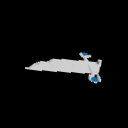

In [0]:
#amk=am1.view((2400,3,128,128))
to_pil(am1[2][9])

In [0]:
out=torch.argmax(out,dim=1)

In [0]:
am=torch.tensor(am)

In [0]:
am=torch.tensor(am)

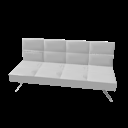

In [0]:
import torchvision
to_pil = torchvision.transforms.ToPILImage()
to_pil(am1[700][11])
#tar = to_pil(train_imag[24])


In [0]:
3

# 3D voxel(model o/p) to mesh representation to be saved in .obj format. 

In [0]:

def evaluate_voxel_prediction(preds, gt, thresh):
    preds_occupy = preds[:, 1, :, :] >= thresh
    diff = np.sum(np.logical_xor(preds_occupy, gt[:, 1, :, :]))
    intersection = np.sum(np.logical_and(preds_occupy, gt[:, 1, :, :]))
    union = np.sum(np.logical_or(preds_occupy, gt[:, 1, :, :]))
    num_fp = np.sum(np.logical_and(preds_occupy, gt[:, 0, :, :]))  # false positive
    num_fn = np.sum(np.logical_and(np.logical_not(preds_occupy), gt[:, 1, :, :]))  # false negative
    return np.array([diff, intersection, union, num_fp, num_fn])


def voxel2mesh(voxels):
    cube_verts = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0],
                  [1, 1, 1]]  # 8 points

    cube_faces = [[0, 1, 2], [1, 3, 2], [2, 3, 6], [3, 7, 6], [0, 2, 6], [0, 6, 4], [0, 5, 1],
                  [0, 4, 5], [6, 7, 5], [6, 5, 4], [1, 7, 3], [1, 5, 7]]  # 12 face

    cube_verts = np.array(cube_verts)
    cube_faces = np.array(cube_faces) + 1

    l, m, n = voxels.shape

    scale = 0.01
    cube_dist_scale = 1.1
    verts = []
    faces = []
    curr_vert = 0
    for i in range(l):
        for j in range(m):
            for k in range(n):
                # If there is a non-empty voxel
                if voxels[i, j, k] > 0:
                    verts.extend(scale * (cube_verts + cube_dist_scale * np.array([[i, j, k]])))
                    faces.extend(cube_faces + curr_vert)
                    curr_vert += len(cube_verts)

    return np.array(verts), np.array(faces)


def write_obj(filename, verts, faces):
    """ write the verts and faces on file."""
    with open(filename, 'w') as f:
        # write vertices
        f.write('g\n# %d vertex\n' % len(verts))
        for vert in verts:
            f.write('v %f %f %f\n' % tuple(vert))

        # write faces
        f.write('# %d faces\n' % len(faces))
        for face in faces:
            f.write('f %d %d %d\n' % tuple(face))


def voxel2obj(filename, pred):
    verts, faces = voxel2mesh(pred)
    write_obj(filename, verts, faces)
 

#You can open .obj in any of the 3D viewing software.
voxel2obj("ash7.obj",arr_3DD[700][11])

torch.Size([800, 24, 32, 32, 32])

In [0]:
#out.shape
#ou=torch.argmax(out,dim=1)


torch.Size([16, 32, 32, 32])

In [0]:
arr_3DD.shape

torch.Size([100, 24, 32, 32, 32])

In [0]:
voxel2obj("ash5.obj",mm[0].cpu())

In [0]:
am=model(data[:1])


In [0]:
mm=torch.argmax(dd,dim=1)

In [0]:
mm.shape

torch.Size([1, 32, 32, 32])

In [0]:
dd=model(am1[33][:1].cuda())

In [0]:
##################DEFINE transform###########
from torchvision import transforms
transform=transforms.Compose([
    transforms.CenterCrop((128,128)),
    transforms.ToTensor()
])

In [0]:
#Here now list 2 contanins name of all the folder images:


def DataRead(path):
    list2={}
    dict1={}
    list1=[]
    ak=os.listdir(path)
    for i in range(len(ak)):
        pk=os.path.join(path,ak[i])
        list1.append(pk)
    for i in range(len(list1)):
        ak=os.listdir(list1[i])
        for j in range(len(ak)):
            pk=os.path.join(list1[i],ak[j])
            dict1.update({j:pk})
        list2.update({i:dict1})
        dict1={}
    
    return list2       
    

In [0]:
#NOW list1 contains all the name of files
#Eg---'F:\\SProject\\ShapeNetRendering\\02691156',
#imges(only images)-----
import torch
#only 5 sets are taken
arr=torch.empty([5,100,24,3,128,128])

path1=r"/content/New folder"

list1=DataRead(path1)
for i in range(5):#(len(list1)):
    print(i)
    for j in range(100):#(len(list1[i])):
        nm=os.path.join(list1[i][j],"rendering/renderings.txt")
        #print(nm)
        pl=pd.read_csv(nm,names=[0])
        for k in range(len(pl)):
            img=Image.open(os.path.join(list1[i][j],"rendering",pl[0][k])).convert("RGB")
            im=transform(img)
            arr[i][j][k]=im
        

0
1
2
3
4


In [0]:
arr.shape


torch.Size([5, 100, 24, 1, 128, 128])

In [0]:
import binvox_rw
def read_3D(an):
    with open(an, 'rb') as f:
        model = binvox_rw.read_as_3d_array(f)
        m=model.data 
        return m.astype(int)

In [0]:
#Now binvox file Time
trans3D=transforms.ToTensor()
path2="r/content/ShapeNetVox32"
arr_3D=torch.empty([5,100,32,32,32])
list2=DataRead(path2)
for i in range(5):#(len(list2)):
    print("Hey its ",i)
    for j in range(100):#(len(list2[i])):
        an=os.path.join(list2[i][j],'model.binvox')#IT CONTAINS THE FINAL DIRECTORIES    
        ap=trans3D(read_3D(an))
        arr_3D[i][j]=ap
        
arr_3D=arr_3D.view(5,100,1,32,32,32)        


In [0]:
path2=r"/content/ShapeNetVox32"
list2=DataRead(path2)

In [0]:
####Making Binary
arr_m=torch.empty(100,1,2,32,32,32)
for i in range(100):
  for j in range(32):
    for k in range(32):
      for l in range(32):
        arr_m[i][0][0][j][k][l]=0
        if arr_3d[i][0][j][k][l]==0:
            arr_m[i][0][1][j][k][l]=0
        elif arr_3d[i][0][j][k][l]==1:
            arr_m[i][0][1][j][k][l]=1
        else:
          print("i")